# import libraries

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Importing & Reading the dataset 

In [135]:
df_weather = pd.read_csv('./raw_data/weatherHistory.csv')

In [136]:
df_weather_row_count, df_weather_column_count=df_weather.shape
print('Total number of rows:', df_weather_row_count)
print('Total number of columns:', df_weather_column_count)

Total number of rows: 96453
Total number of columns: 12


# Preprocessing

## Initial Analysis of Data

In [137]:
df_weather[20: 400:24]

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
20,2006-04-01 20:00:00.000 +0200,Mostly Cloudy,rain,11.550000,11.550000,0.77,7.3899,147.0,11.0285,0.0,1015.85,Partly cloudy throughout the day.
44,2006-04-10 20:00:00.000 +0200,Mostly Cloudy,rain,16.061111,16.061111,0.53,21.3969,149.0,9.9820,0.0,1008.11,Mostly cloudy throughout the day.
68,2006-04-11 20:00:00.000 +0200,Overcast,rain,8.961111,5.777778,0.93,23.2162,340.0,3.8157,0.0,1004.85,Foggy in the evening.
92,2006-04-12 20:00:00.000 +0200,Mostly Cloudy,rain,9.900000,7.716667,0.66,15.7297,348.0,11.0285,0.0,1005.48,Foggy overnight and breezy in the morning.
116,2006-04-13 20:00:00.000 +0200,Overcast,rain,8.072222,6.433333,0.75,9.5151,150.0,9.9820,0.0,1010.91,Overcast throughout the day.
140,2006-04-14 20:00:00.000 +0200,Mostly Cloudy,rain,13.850000,13.850000,0.64,11.5598,231.0,11.4471,0.0,1013.42,Mostly cloudy throughout the day.
164,2006-04-15 20:00:00.000 +0200,Mostly Cloudy,rain,13.088889,13.088889,0.67,9.2736,138.0,9.9820,0.0,1017.38,Mostly cloudy throughout the day.
188,2006-04-16 20:00:00.000 +0200,Mostly Cloudy,rain,13.922222,13.922222,0.78,11.7691,279.0,11.2861,0.0,1011.64,Mostly cloudy throughout the day.
212,2006-04-17 20:00:00.000 +0200,Mostly Cloudy,rain,13.250000,13.250000,0.69,4.7173,325.0,9.9820,0.0,1011.76,Partly cloudy throughout the day.
236,2006-04-18 20:00:00.000 +0200,Mostly Cloudy,rain,16.188889,16.188889,0.61,5.0876,25.0,10.3523,0.0,1011.50,Partly cloudy until night.


## Sort Dataset

In [138]:
df_weather = df_weather.sort_values(by='Formatted Date')

In [139]:
df_weather[20: 400:24]

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
2900,2006-01-01 20:00:00.000 +0100,Overcast,rain,5.972222,1.861111,0.80,24.2305,140.0,11.2700,0.0,1009.39,Mostly cloudy throughout the day.
3164,2006-01-02 20:00:00.000 +0100,Overcast,rain,2.855556,-1.644444,0.96,20.1733,209.0,4.0250,0.0,1012.58,Overcast throughout the day.
3428,2006-01-03 20:00:00.000 +0100,Overcast,rain,2.244444,2.244444,0.92,2.6887,166.0,10.7709,0.0,1023.73,Mostly cloudy throughout the day.
3500,2006-01-04 20:00:00.000 +0100,Overcast,rain,2.733333,-1.405556,0.89,17.3719,20.0,11.1251,0.0,1024.21,Overcast throughout the day.
3524,2006-01-05 20:00:00.000 +0100,Overcast,rain,2.827778,0.566667,1.00,8.1305,344.0,4.2021,0.0,0.00,Foggy in the morning.
3548,2006-01-06 20:00:00.000 +0100,Overcast,rain,2.222222,-0.144444,1.00,8.1305,338.0,5.8604,0.0,1025.57,Foggy until morning.
3572,2006-01-07 20:00:00.000 +0100,Mostly Cloudy,snow,-1.016667,-2.783333,0.99,5.1198,53.0,6.0697,0.0,1032.54,Foggy starting overnight continuing until morn...
3596,2006-01-08 20:00:00.000 +0100,Clear,snow,-2.222222,-5.250000,0.88,7.7602,30.0,9.8049,0.0,1036.36,Partly cloudy in the afternoon.
3620,2006-01-09 20:00:00.000 +0100,Mostly Cloudy,snow,-1.222222,-1.222222,0.88,0.1288,225.0,9.9820,0.0,1033.58,Partly cloudy starting in the morning.
2924,2006-01-10 20:00:00.000 +0100,Clear,snow,-1.500000,-1.500000,0.85,3.3166,283.0,7.2128,0.0,1032.81,Mostly cloudy until afternoon.


In [140]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96453 entries, 2880 to 89732
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 9.6+ MB


In [141]:
print ("Unique values are:\n",df_weather.nunique())

Unique values are:
 Formatted Date              96429
Summary                        27
Precip Type                     2
Temperature (C)              7574
Apparent Temperature (C)     8984
Humidity                       90
Wind Speed (km/h)            2484
Wind Bearing (degrees)        360
Visibility (km)               949
Loud Cover                      1
Pressure (millibars)         4979
Daily Summary                 214
dtype: int64


## Missing Value Detection

In [142]:
wt_missing =df_weather.isna().sum()
wt_missing 

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [143]:
# get the number of missing data points per column
missing_value_count = (df_weather.isnull().sum())
print(missing_value_count[missing_value_count > 0])
# percentage of missing data
total_cells = np.product(df_weather.shape)
total_missing_value = missing_value_count.sum()
print("Total percentage of our missing value is:",round((total_missing_value / total_cells * 100),4))
print('Total number of our cells is :',total_cells)
print('Total number of our missing value is :',total_missing_value)

Precip Type    517
dtype: int64
Total percentage of our missing value is: 0.0447
Total number of our cells is : 1157436
Total number of our missing value is : 517


In [144]:
df_weather['Precip Type'].fillna(df_weather['Precip Type'].value_counts().index[0],inplace=True)
df_weather.isna().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

## Remove unimportant features

### Summary

So Now let's delete 'Daily Summary', we do not need it because we do have 'Summary' feature

In [145]:
df_weather.drop(["Daily Summary"], axis=1, inplace=True)

In [146]:
df_weather.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)'],
      dtype='object')

### Loud cover

Remove variables which do not have much impact on the prediction. Calculate the value of loud cover: it is same for all rows, so I can remove it.

In [147]:
df_weather['Loud Cover'].value_counts()

Loud Cover
0.0    96453
Name: count, dtype: int64

In [148]:
df_weather.drop(['Loud Cover'],axis=1,inplace=True)

In [149]:
df_weather.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)'],
      dtype='object')

## Convert categorical data

### Summary
One-hot Encoding of Summary

In [150]:
Summary_Weather=df_weather["Summary"].value_counts().reset_index()
Summary_Weather.columns=["Weather Type","Count"]
Summary_Weather

,Weather Type,Count
0,Partly Cloudy,31733
1,Mostly Cloudy,28094
2,Overcast,16597
3,Clear,10890
4,Foggy,7148
5,Breezy and Overcast,528
6,Breezy and Mostly Cloudy,516
7,Breezy and Partly Cloudy,386
8,Dry and Partly Cloudy,86
9,Windy and Partly Cloudy,67


In [151]:
print(df_weather['Summary'].unique())

['Partly Cloudy' 'Mostly Cloudy' 'Overcast' 'Foggy' 'Clear'
 'Breezy and Overcast' 'Breezy and Mostly Cloudy' 'Windy and Overcast'
 'Windy and Foggy' 'Breezy and Foggy' 'Breezy and Partly Cloudy'
 'Windy and Partly Cloudy' 'Humid and Mostly Cloudy'
 'Humid and Partly Cloudy' 'Breezy' 'Windy and Mostly Cloudy'
 'Dangerously Windy and Partly Cloudy' 'Dry and Partly Cloudy' 'Dry'
 'Windy' 'Humid and Overcast' 'Breezy and Dry' 'Dry and Mostly Cloudy'
 'Light Rain' 'Drizzle' 'Windy and Dry' 'Rain']


In [152]:
df_weather = pd.get_dummies(df_weather, columns = ['Summary'])


In [153]:
df_weather.head(10)

,Formatted Date,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary_Breezy,...,Summary_Mostly Cloudy,Summary_Overcast,Summary_Partly Cloudy,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Summary_Windy and Partly Cloudy
2880,2006-01-01 00:00:00.000 +0100,rain,0.577778,-4.050000,0.89,17.1143,140.0,9.9820,1016.66,False,...,False,False,True,False,False,False,False,False,False,False
2881,2006-01-01 01:00:00.000 +0100,rain,1.161111,-3.238889,0.85,16.6152,139.0,9.9015,1016.15,False,...,True,False,False,False,False,False,False,False,False,False
2882,2006-01-01 02:00:00.000 +0100,rain,1.666667,-3.155556,0.82,20.2538,140.0,9.9015,1015.87,False,...,True,False,False,False,False,False,False,False,False,False
2883,2006-01-01 03:00:00.000 +0100,rain,1.711111,-2.194444,0.82,14.4900,140.0,9.9015,1015.56,False,...,False,True,False,False,False,False,False,False,False,False
2884,2006-01-01 04:00:00.000 +0100,rain,1.183333,-2.744444,0.86,13.9426,134.0,9.9015,1014.98,False,...,True,False,False,False,False,False,False,False,False,False
2885,2006-01-01 05:00:00.000 +0100,rain,1.205556,-3.072222,0.85,15.9068,149.0,9.9820,1014.08,False,...,True,False,False,False,False,False,False,False,False,False
2886,2006-01-01 06:00:00.000 +0100,rain,2.222222,-2.494444,0.79,20.5597,140.0,10.0464,1013.93,False,...,True,False,False,False,False,False,False,False,False,False
2887,2006-01-01 07:00:00.000 +0100,rain,2.072222,-3.272222,0.81,25.4219,136.0,10.0303,1013.24,False,...,True,False,False,False,False,False,False,False,False,False
2888,2006-01-01 08:00:00.000 +0100,rain,2.200000,-2.850000,0.80,23.1679,140.0,11.2056,1013.19,False,...,True,False,False,False,False,False,False,False,False,False
2889,2006-01-01 09:00:00.000 +0100,rain,2.733333,-2.133333,0.82,22.8781,140.0,9.9820,1013.29,False,...,True,False,False,False,False,False,False,False,False,False


## Precip Type
Encode labels in column 'Precip Type'

In [154]:
precip_Label= df_weather["Precip Type"].value_counts().reset_index()
precip_Label.columns=["Precip Type","Count"]
precip_Label

,Precip Type,Count
0,rain,85741
1,snow,10712


In [155]:
le = LabelEncoder()
df_weather['Precip Type']=le.fit_transform(df_weather['Precip Type'])

In [156]:
df_weather.head(20)

,Formatted Date,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary_Breezy,...,Summary_Mostly Cloudy,Summary_Overcast,Summary_Partly Cloudy,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Summary_Windy and Partly Cloudy
2880,2006-01-01 00:00:00.000 +0100,0,0.577778,-4.050000,0.89,17.1143,140.0,9.9820,1016.66,False,...,False,False,True,False,False,False,False,False,False,False
2881,2006-01-01 01:00:00.000 +0100,0,1.161111,-3.238889,0.85,16.6152,139.0,9.9015,1016.15,False,...,True,False,False,False,False,False,False,False,False,False
2882,2006-01-01 02:00:00.000 +0100,0,1.666667,-3.155556,0.82,20.2538,140.0,9.9015,1015.87,False,...,True,False,False,False,False,False,False,False,False,False
2883,2006-01-01 03:00:00.000 +0100,0,1.711111,-2.194444,0.82,14.4900,140.0,9.9015,1015.56,False,...,False,True,False,False,False,False,False,False,False,False
2884,2006-01-01 04:00:00.000 +0100,0,1.183333,-2.744444,0.86,13.9426,134.0,9.9015,1014.98,False,...,True,False,False,False,False,False,False,False,False,False
2885,2006-01-01 05:00:00.000 +0100,0,1.205556,-3.072222,0.85,15.9068,149.0,9.9820,1014.08,False,...,True,False,False,False,False,False,False,False,False,False
2886,2006-01-01 06:00:00.000 +0100,0,2.222222,-2.494444,0.79,20.5597,140.0,10.0464,1013.93,False,...,True,False,False,False,False,False,False,False,False,False
2887,2006-01-01 07:00:00.000 +0100,0,2.072222,-3.272222,0.81,25.4219,136.0,10.0303,1013.24,False,...,True,False,False,False,False,False,False,False,False,False
2888,2006-01-01 08:00:00.000 +0100,0,2.200000,-2.850000,0.80,23.1679,140.0,11.2056,1013.19,False,...,True,False,False,False,False,False,False,False,False,False
2889,2006-01-01 09:00:00.000 +0100,0,2.733333,-2.133333,0.82,22.8781,140.0,9.9820,1013.29,False,...,True,False,False,False,False,False,False,False,False,False


## Data visualization

array([<Axes: xlabel='Formatted Date'>, <Axes: xlabel='Formatted Date'>,
       <Axes: xlabel='Formatted Date'>, <Axes: xlabel='Formatted Date'>,
       <Axes: xlabel='Formatted Date'>, <Axes: xlabel='Formatted Date'>,
       <Axes: xlabel='Formatted Date'>], dtype=object)

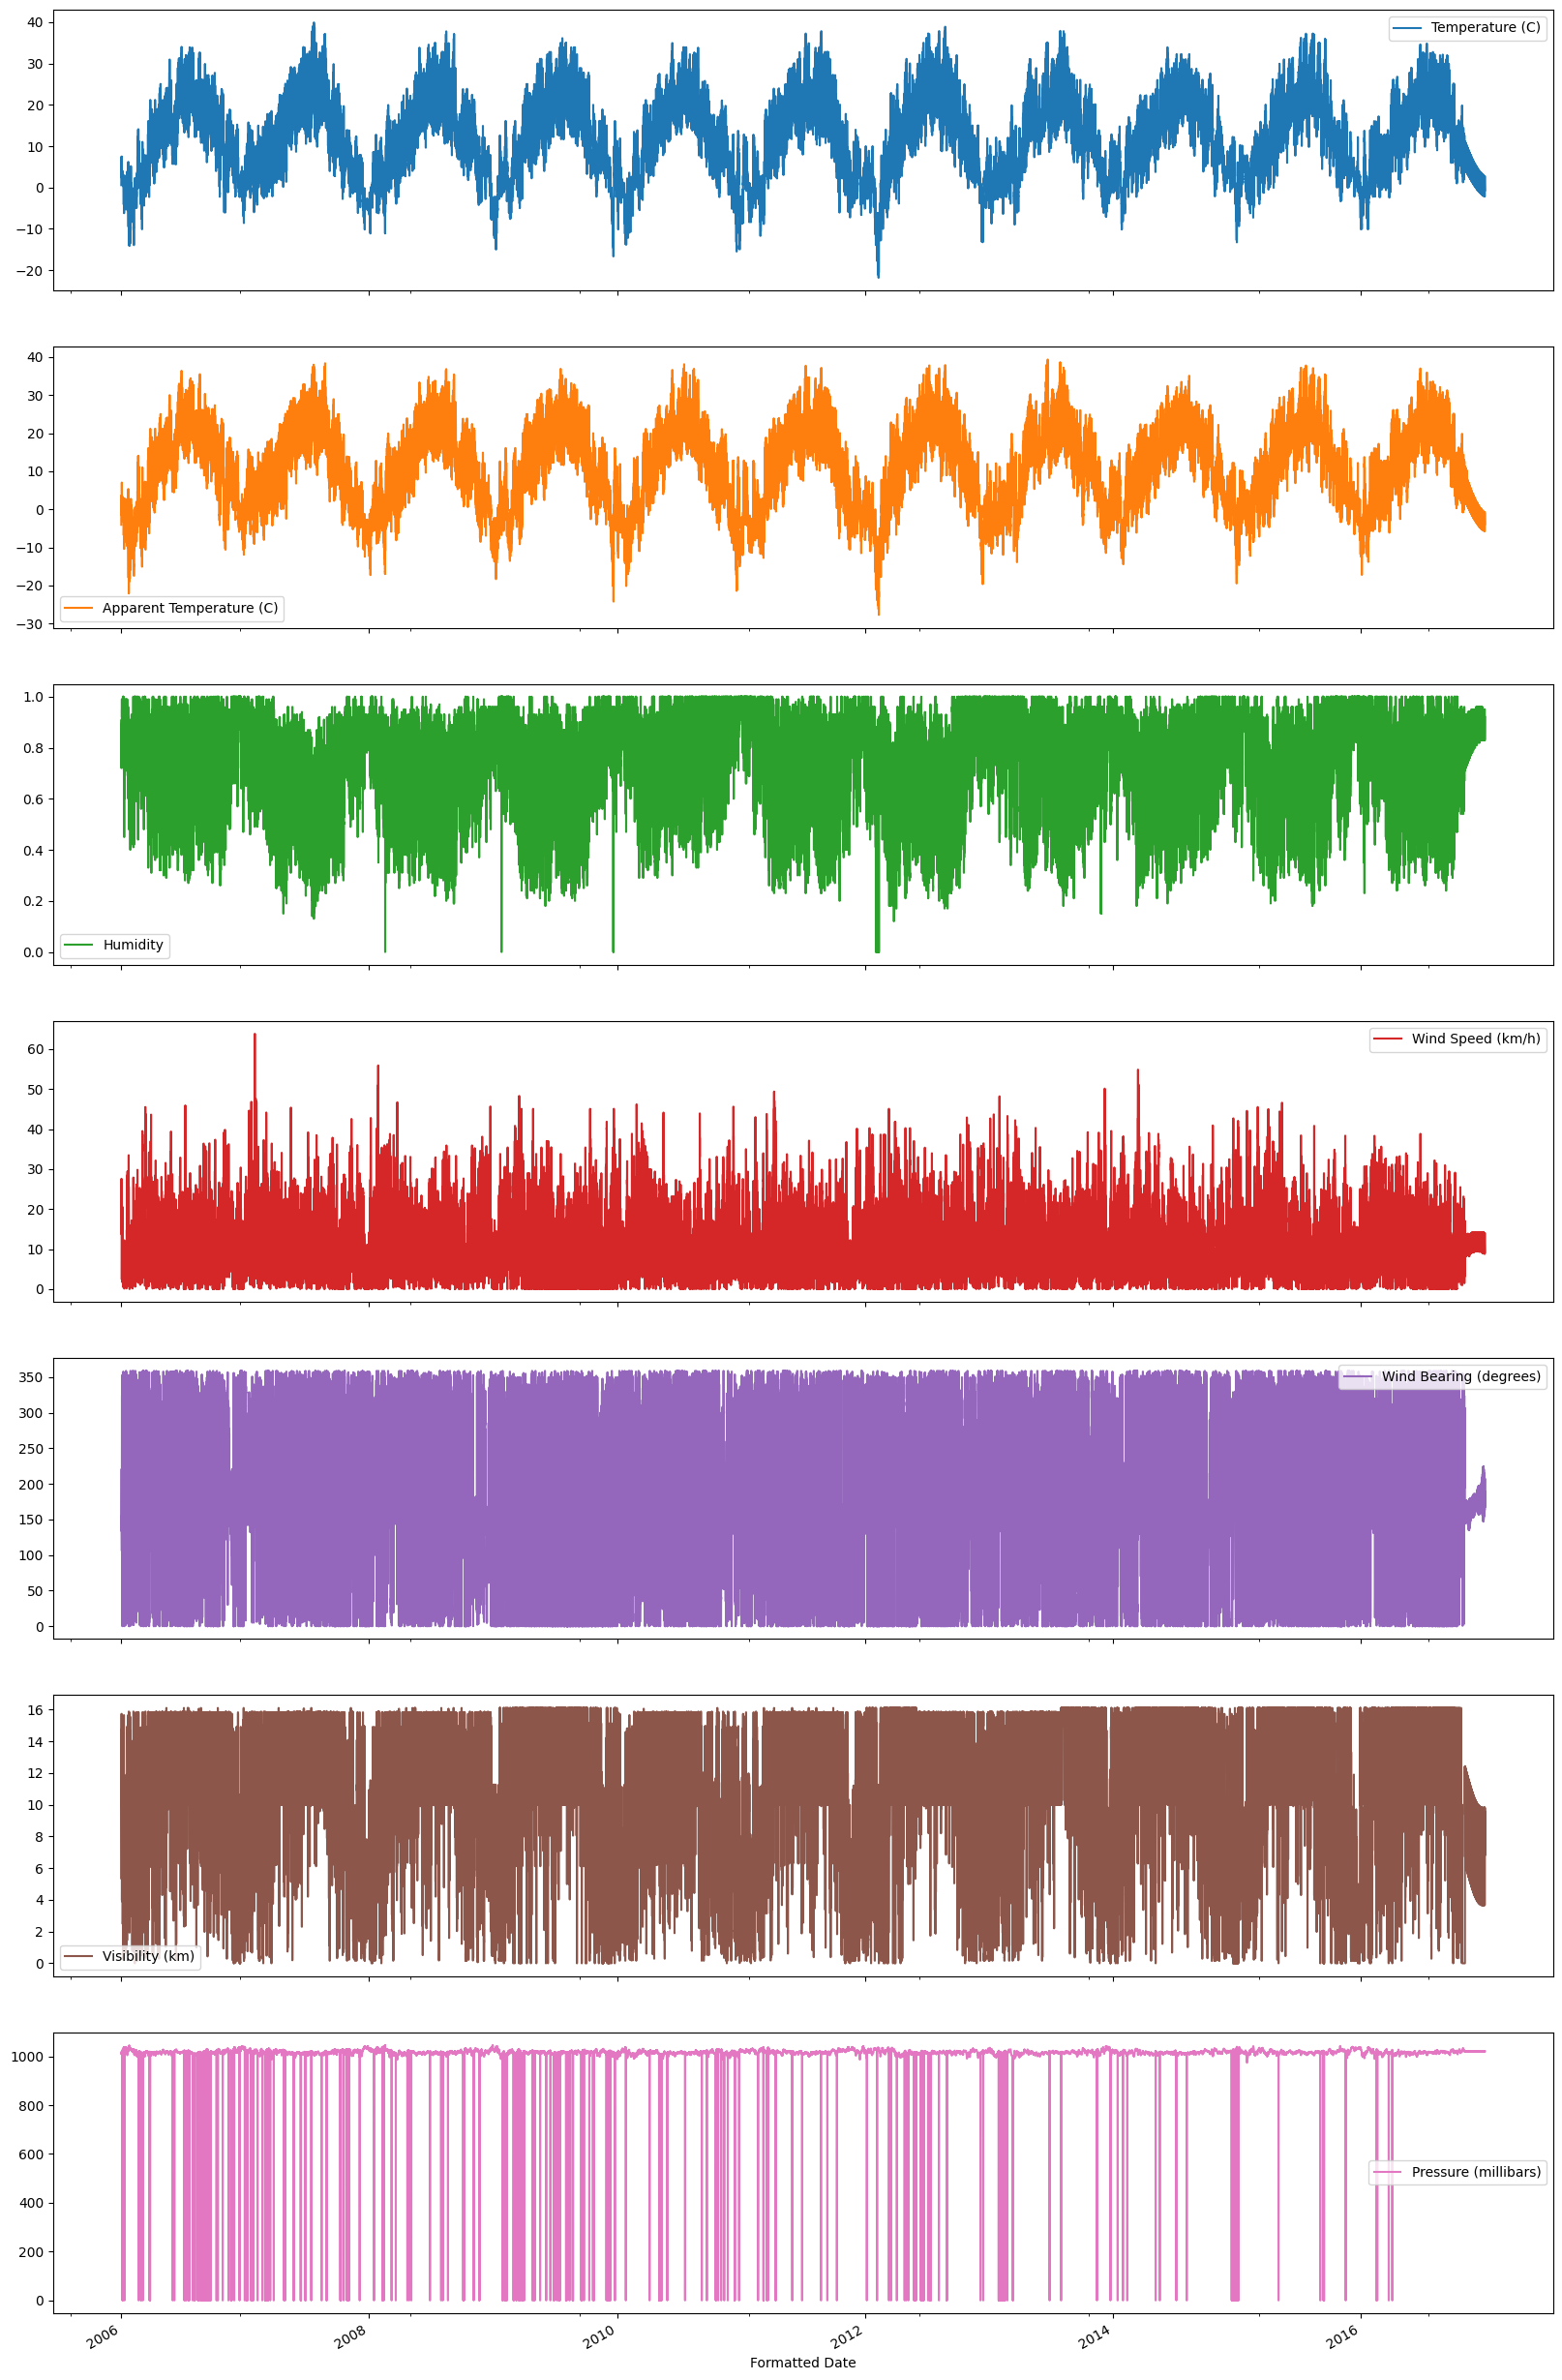

In [157]:
date_time = pd.to_datetime(df_weather['Formatted Date'], format='%Y-%m-%d %H:%M:%S.%f %z')
plot_cols = [ 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)' ]
plot_features = df_weather[plot_cols]
plot_features.index = date_time
plot_features.plot(figsize=(20,35), subplots=True)

In [158]:
df_weather

,Formatted Date,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary_Breezy,...,Summary_Mostly Cloudy,Summary_Overcast,Summary_Partly Cloudy,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Summary_Windy and Partly Cloudy
2880,2006-01-01 00:00:00.000 +0100,0,0.577778,-4.050000,0.89,17.1143,140.0,9.9820,1016.66,False,...,False,False,True,False,False,False,False,False,False,False
2881,2006-01-01 01:00:00.000 +0100,0,1.161111,-3.238889,0.85,16.6152,139.0,9.9015,1016.15,False,...,True,False,False,False,False,False,False,False,False,False
2882,2006-01-01 02:00:00.000 +0100,0,1.666667,-3.155556,0.82,20.2538,140.0,9.9015,1015.87,False,...,True,False,False,False,False,False,False,False,False,False
2883,2006-01-01 03:00:00.000 +0100,0,1.711111,-2.194444,0.82,14.4900,140.0,9.9015,1015.56,False,...,False,True,False,False,False,False,False,False,False,False
2884,2006-01-01 04:00:00.000 +0100,0,1.183333,-2.744444,0.86,13.9426,134.0,9.9015,1014.98,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89728,2016-12-31 19:00:00.000 +0100,0,0.488889,-2.644444,0.86,9.7566,167.0,8.0178,1020.03,False,...,True,False,False,False,False,False,False,False,False,False
89729,2016-12-31 20:00:00.000 +0100,0,0.072222,-3.050000,0.88,9.4185,169.0,7.2450,1020.27,False,...,True,False,False,False,False,False,False,False,False,False
89730,2016-12-31 21:00:00.000 +0100,1,-0.233333,-3.377778,0.89,9.2736,175.0,9.5795,1020.50,False,...,True,False,False,False,False,False,False,False,False,False
89731,2016-12-31 22:00:00.000 +0100,1,-0.472222,-3.644444,0.91,9.2414,182.0,8.4042,1020.65,False,...,True,False,False,False,False,False,False,False,False,False


## Inspect and cleanup

### Cut dataset

In [159]:
df_weather = df_weather.drop(df_weather.tail(1500).index)
date_time = date_time[:-1500]

### Pressure (millibars)

In [160]:
df_weather["Pressure (millibars)"].value_counts()

Pressure (millibars)
0.00       1288
1017.70     123
1015.00     119
1018.00     118
1015.80     118
           ... 
999.45        1
1000.95       1
994.40        1
990.97        1
997.59        1
Name: count, Length: 4979, dtype: int64

Tính tỉ lệ nhiễu (ngoại lai):

In [161]:
pressure = df_weather['Pressure (millibars)']
bad_pressure = pressure == 0
pressure[bad_pressure].count()

print("Total percentage of our missing value is:",round((pressure[bad_pressure].count() / pressure.count() * 100),4))


Total percentage of our missing value is: 1.3565


Loại bỏ nhiễu (ngoại lai):

In [162]:
pressure.loc[bad_pressure] = pressure.mean()

/tmp/ipykernel_4954/4003182636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pressure.loc[bad_pressure] = pressure.mean()


array([<Axes: xlabel='Formatted Date'>, <Axes: xlabel='Formatted Date'>,
       <Axes: xlabel='Formatted Date'>, <Axes: xlabel='Formatted Date'>,
       <Axes: xlabel='Formatted Date'>, <Axes: xlabel='Formatted Date'>,
       <Axes: xlabel='Formatted Date'>, <Axes: xlabel='Formatted Date'>],
      dtype=object)

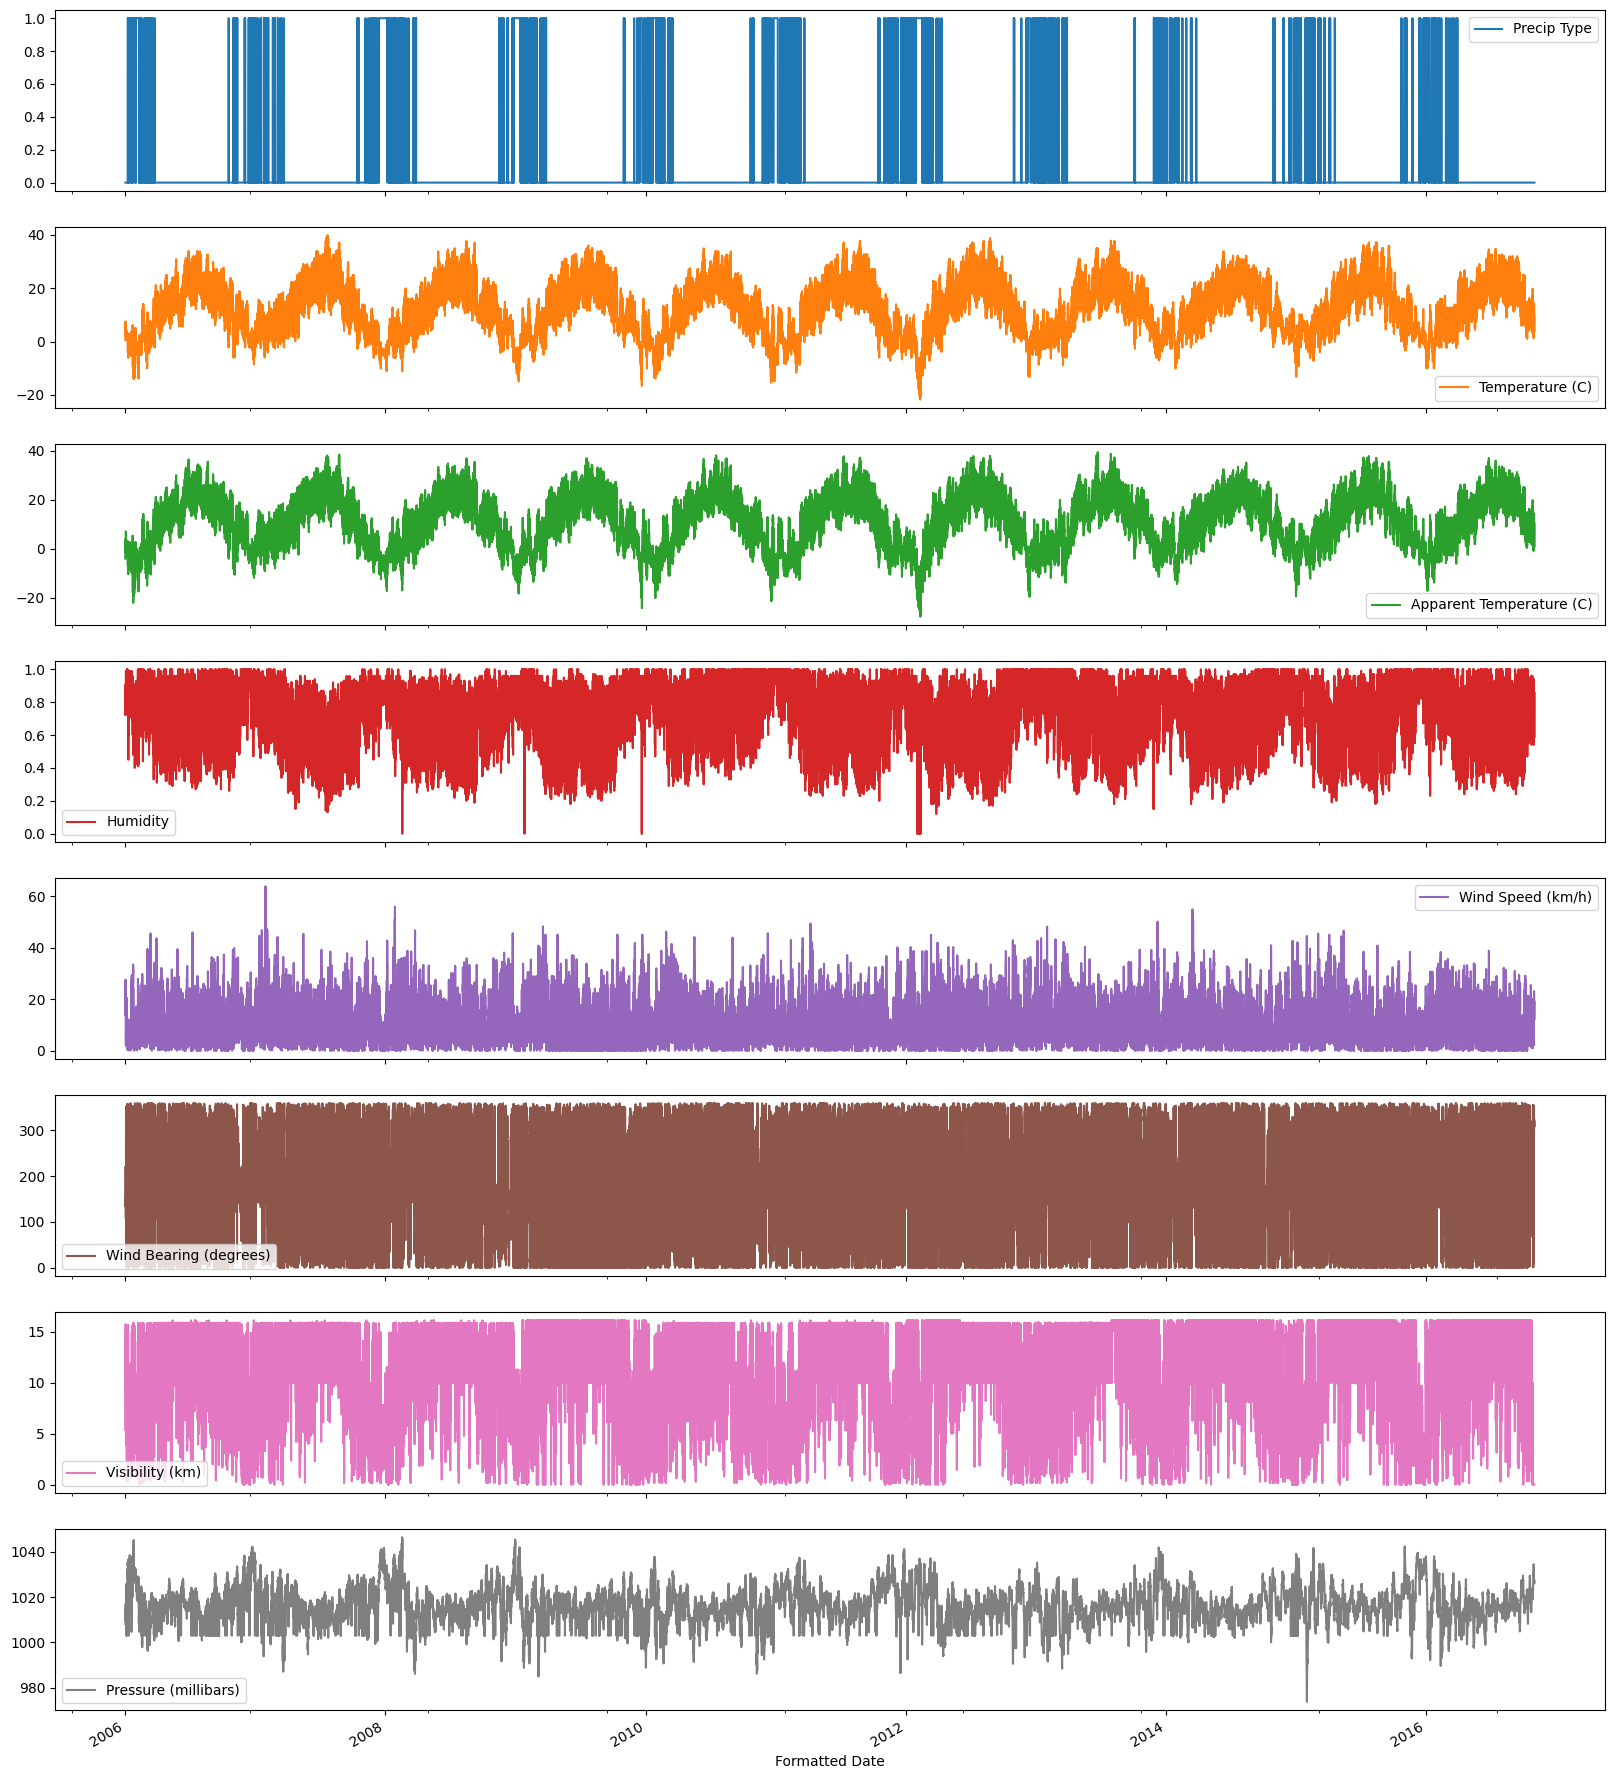

In [163]:
plot_cols = df_weather.columns
plot_features = df_weather[plot_cols]
plot_features.index = date_time
plot_features.plot( figsize=(20,25), subplots=True)

## Feature engineering
Trước khi bắt đầu xây dựng mô hình, điều quan trọng là phải hiểu dữ liệu của bạn và đảm bảo rằng bạn đang chuyển dữ liệu được định dạng phù hợp cho mô hình.

### Wind
Wind Bearing(degrees) —giới thiệu hướng gió theo đơn vị độ. Các góc không tạo ra đầu vào mô hình tốt: 360 ° và 0 ° phải gần nhau và quấn quanh trơn tru. Phương hướng sẽ không thành vấn đề nếu gió không thổi.

Text(0, 0.5, 'Wind Velocity [km/h]')

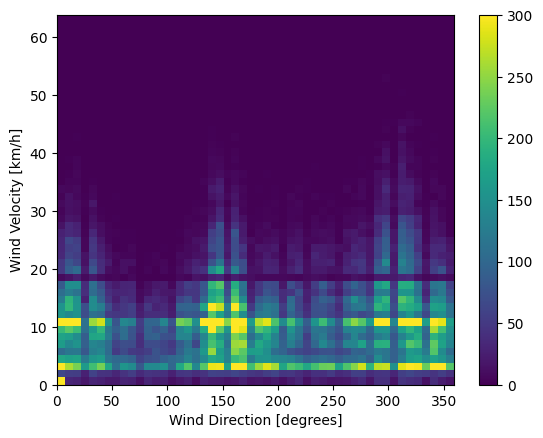

In [164]:
plt.hist2d(df_weather['Wind Bearing (degrees)'], df_weather['Wind Speed (km/h)'], bins=(50, 50), vmax=300)
plt.colorbar()
plt.xlabel('Wind Direction [degrees]')
plt.ylabel('Wind Velocity [km/h]')

Chuyển hướng gió và vận tốc gió thành vector.

In [165]:
wv = df_weather.pop('Wind Speed (km/h)')

# Convert to radians.
wd_rad = df_weather.pop('Wind Bearing (degrees)')*np.pi / 180

# Calculate the wind x and y components.
df_weather['Wx'] = wv*np.cos(wd_rad)
df_weather['Wy'] = wv*np.sin(wd_rad)


(-43.126701119910614, 42.78495677847904, -50.9949537688458, 45.9333)

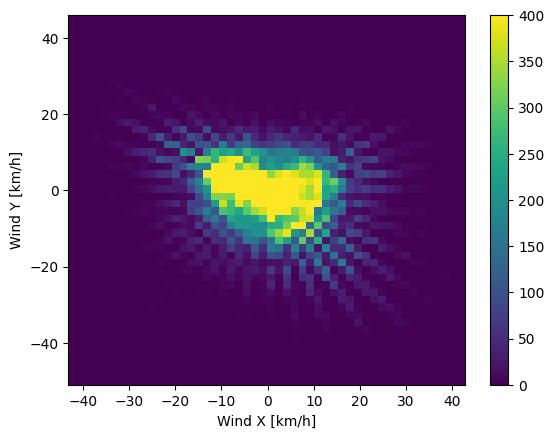

In [166]:
plt.hist2d(df_weather['Wx'], df_weather['Wy'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [km/h]')
plt.ylabel('Wind Y [km/h]')
ax = plt.gca()
ax.axis('tight')

### Time
Tương tự như hướng gió, thời gian tính bằng giây không phải là đầu vào mô hình hữu ích. Là dữ liệu thời tiết, nó có tính định kỳ hàng ngày và hàng năm rõ ràng. 

Sử dụng các phép biến đổi sin và côsin để xóa các tín hiệu "Thời gian trong ngày" và "Thời gian trong năm":

In [167]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)
day = 24*60*60
year = (365.2425)*day

df_weather['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df_weather['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df_weather['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df_weather['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

Text(0.5, 1.0, 'Time of day signal')

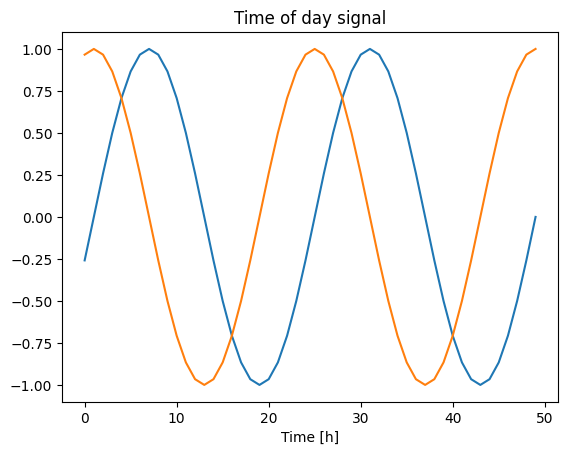

In [168]:
plt.plot(np.array(df_weather['Day sin'])[:50])
plt.plot(np.array(df_weather['Day cos'])[:50])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

# Generate Dataset

## Split the data
Chia (70%, 20%, 10%) cho các tập huấn luyện, xác thực và thử nghiệm.

In [169]:
n = len(df_weather)
train_df = df_weather[0:int(n*0.7)]
val_df = df_weather[int(n*0.7):int(n*0.9)]
test_df = df_weather[int(n*0.9):]

num_features = df_weather.shape[1]

## Export data

In [170]:
train_df.to_csv(r'./processed_data/trainset.csv', index = False)
val_df.to_csv(r'./processed_data/valset.csv', index = False)
test_df.to_csv(r'./processed_data/testset.csv', index = False)